In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

In [ ]:
brand = pd.read_csv("df_all")

In [12]:
brand['중분류업종'].value_counts()

한식           1586
기타 외식         944
커피            441
치킨            421
분식            400
주점            376
일식            222
제과제빵          220
서양식           165
기타 외국식        117
피자            115
중식            110
패스트푸드         106
음료 (커피 외)      88
아이스크림/빙수       63
Name: 중분류업종, dtype: int64

In [14]:
brand['중분류업종'].value_counts(normalize=True)

한식           0.295125
기타 외식        0.175661
커피           0.082062
치킨           0.078340
분식           0.074432
주점           0.069967
일식           0.041310
제과제빵         0.040938
서양식          0.030703
기타 외국식       0.021771
피자           0.021399
중식           0.020469
패스트푸드        0.019725
음료 (커피 외)    0.016375
아이스크림/빙수     0.011723
Name: 중분류업종, dtype: float64

In [43]:
brand

,브랜드명,중분류업종,창업비용(단위:천원),본사업력(년),본사부채비율(%),수익성,공정성,성장성,안정성
0,이디야커피,커피,"129,130",21,88,4,3,3,3
1,비비큐,치킨,"90,789",28,58,3,3,4,3
2,비비큐(BBQ),치킨,"256,548",28,1500,2,2,3,5
3,비에이치씨(BHC),치킨,"85,436",19,205,5,3,4,4
4,배스킨라빈스,아이스크림/빙수,"323,350",37,24,4,3,3,2
...,...,...,...,...,...,...,...,...,...
19,왕짱구,기타 외식,"57,050",18,3,5,3,3,2
20,심민속촌,기타 외식,"395,100",8,102,3,3,2,3
21,오늘게장,한식,"35,100",3,-3594,2,3,0,1
22,모던타코,기타 외식,"19,690",7,299,3,3,0,4


In [75]:
#칼럼이름을 영어로 변경
brand=brand.rename(columns={'브랜드명':'brand', '중분류업종':'category', '창업비용(단위:천원)':'cost', 
                                      '본사업력(년)':'year', '본사부채비율(%)':'debt_ratio', '수익성':'profit',
                                      '공정성':'fairness', '성장성':'growth', '안정성':'stability'})

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/Users/moon/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/moon/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

--------------------------------------------------------

/Users/moon/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

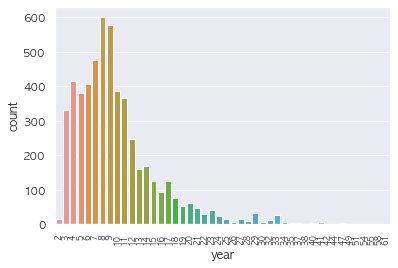

In [138]:
#본사 업력 시각화
# 5- 11년 가장 많음, 3년 이상의 신생 브랜드는 많으나, 11년 이후 급격히 떨어지는 추세
plt.xticks(rotation=90, fontsize=8)
sns.countplot(brand['year'])


<AxesSubplot:>

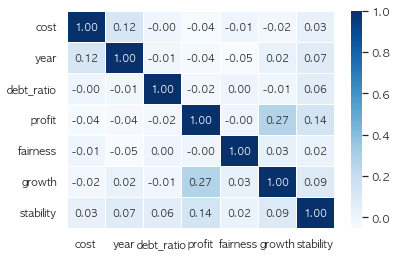

In [130]:
sns.heatmap(data = brand[brand.columns[2:].tolist()].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='cost'>

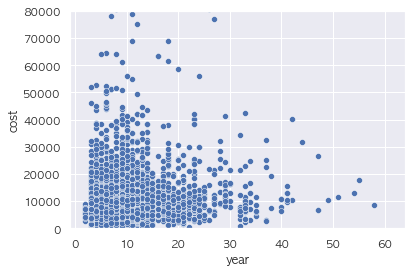

In [134]:
#30년 이상 된 브랜드는 창업 비용이 높은 경우가 거의 없음
plt.ylim([0, 80000])
sns.scatterplot(x='year',y='cost',data =brand )

<AxesSubplot:xlabel='year', ylabel='stability'>

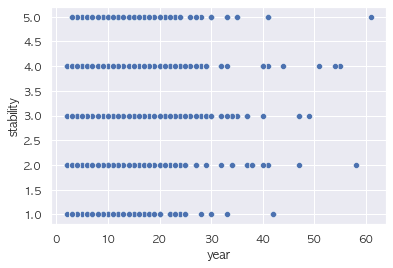

In [135]:
sns.scatterplot(x='year',y='stability',data =brand, )

<AxesSubplot:xlabel='category', ylabel='year'>

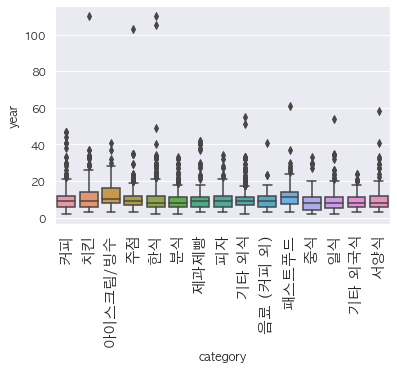

In [69]:
#본사 업력이 100 이상되는 이상치 존재
plt.xticks(rotation=90, fontsize=15)
sns.boxplot(y = 'year', x = 'category', data =brand)

In [70]:
brand[brand['year']>100]

,brand,category,cost,year,debt_ratio,profit,fairness,growth,stability
552,탕쓱잘튀기는집,한식,48100,110,15,4,3,4,2
1573,굽는치킨,치킨,14520,110,15,4,3,4,2
2493,엔틱정,주점,204100,103,480,4,3,0,5
4574,찬장,한식,177900,105,156,4,3,5,4


In [74]:
#이상치 제거
brand=brand.drop([552,1573,2493, 4574])

<AxesSubplot:xlabel='category', ylabel='year'>

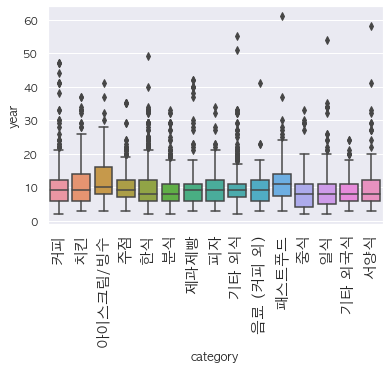

In [75]:
plt.xticks(rotation=90, fontsize=15)
sns.boxplot(y = 'year', x = 'category', data =brand)

---

In [48]:
#창업비용에 오기입 존재 #창업비용이 9백억
brand[brand['brand']=='헬로티황차'] 

,brand,category,cost,year,debt_ratio,profit,fairness,growth,stability
4678,헬로티황차,음료 (커피 외),92636000,6,284,1,3,5,5


In [59]:
#오기입 데이터 삭제
brand=brand.drop(4678)

In [62]:
sns.set(rc = {'figure.figsize':(8,3)})

<AxesSubplot:xlabel='category', ylabel='cost'>

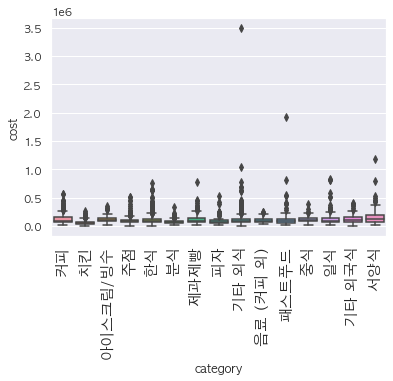

In [67]:
#창업비용에 극한의 이상치 존재
plt.xticks(rotation=90, fontsize=15)
sns.boxplot(y = 'cost', x = 'category', data =brand)

In [22]:
brand[brand['cost']>1000000]

,brand,category,cost,year,debt_ratio,profit,fairness,growth,stability
2597,토다이(TODAI),기타 외식,3491500,15,262,2,3,3,4
3739,더오리지널팬케이크하우스,기타 외식,1047250,32,140,5,3,2,4
3741,에델바이스,서양식,1179900,15,232,3,3,4,4
3871,Dairy,패스트푸드,1918000,61,1390,5,3,3,5


In [23]:
#cost가 1500000가 넘는 것 삭제
brand=brand.drop(2597)
brand=brand.drop(3871)

In [19]:
brand

,brand,category,cost,year,debt_ratio,profit,fairness,growth,stability
0,이디야커피,커피,129130,21,88,4,3,3,3
1,비비큐,치킨,90789,28,58,3,3,4,3
2,비비큐(BBQ),치킨,256548,28,1500,2,2,3,5
3,비에이치씨(BHC),치킨,85436,19,205,5,3,4,4
4,배스킨라빈스,아이스크림/빙수,323350,37,24,4,3,3,2
...,...,...,...,...,...,...,...,...,...
5369,왕짱구,기타 외식,57050,18,3,5,3,3,2
5370,심민속촌,기타 외식,395100,8,102,3,3,2,3
5371,오늘게장,한식,35100,3,-3594,2,3,0,1
5372,모던타코,기타 외식,19690,7,299,3,3,0,4


<AxesSubplot:xlabel='category', ylabel='cost'>

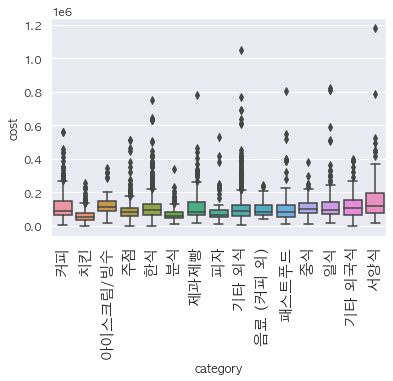

In [33]:
plt.xticks(rotation=90, fontsize=15)
sns.boxplot(y = 'cost', x = 'category', data =brand)

In [140]:
brand['profit'].value_counts()

1    1203
3    1089
5    1050
2    1041
4     985
0       1
Name: profit, dtype: int64

In [141]:
brand['growth'].value_counts()

2    1068
1     940
3     906
4     895
5     834
0     726
Name: growth, dtype: int64

In [142]:
#다른 것과 달리  fairness는 3이 최대
brand['fairness'].value_counts()

3    5355
2      11
1       3
Name: fairness, dtype: int64

In [143]:
brand['stability'].value_counts()

1    1186
2    1103
5    1062
4    1041
3     977
Name: stability, dtype: int64

In [124]:
brand['cost']=pd.to_numeric(brand['cost'])

In [101]:
#cost의 단위를 천원 -> 만원 으로 변경
brand['cost']=[str(i)[:-1] for i in brand['cost']]

In [125]:
brand

,brand,category,cost,year,debt_ratio,profit,fairness,growth,stability
0,이디야커피,커피,12913.0,21,88,4,3,3,3
1,비비큐,치킨,9078.0,28,58,3,3,4,3
2,비비큐(BBQ),치킨,25654.0,28,1500,2,2,3,5
3,비에이치씨(BHC),치킨,8543.0,19,205,5,3,4,4
4,배스킨라빈스,아이스크림/빙수,32335.0,37,24,4,3,3,2
...,...,...,...,...,...,...,...,...,...
5369,왕짱구,기타 외식,5705.0,18,3,5,3,3,2
5370,심민속촌,기타 외식,39510.0,8,102,3,3,2,3
5371,오늘게장,한식,3510.0,3,-3594,2,3,0,1
5372,모던타코,기타 외식,1969.0,7,299,3,3,0,4


In [129]:
brand.to_csv("brand_del_outlier.csv")